Preprocessing data, creating generators for training, validation and testing data, training various models, plotting results. Best val loss = 0.2.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import layers
df = pd.read_csv("drive/MyDrive/Engineer's Project/test.csv")

In [ ]:
df.pop('Date')
df.head()

,Opening,High,Low,Closing,Momentum,Range,ohlc,usa_cpi,pol_cpi,usa_inter,pol_inter
0,2.879833,2.8879,2.8701,2.879821,0.000011,0.0178,2.879414,1.143161,2.7,2.76,5.82
1,2.884751,2.8941,2.8741,2.884744,0.000007,0.0200,2.884424,1.143161,2.7,2.76,5.82
2,2.922487,2.9499,2.8787,2.922526,-0.000040,0.0712,2.918403,1.143161,2.7,2.76,5.82
3,2.924881,2.9462,2.9071,2.924866,0.000015,0.0391,2.925762,1.143161,2.7,2.76,5.82
4,2.889930,2.9105,2.8762,2.889919,0.000011,0.0343,2.891637,1.143161,2.7,2.76,5.82


In [ ]:
float_data = np.array(df).astype('float32')

In [ ]:
mean = float_data[:2800].mean(axis=0)
float_data -= mean
std = float_data[:2800].std(axis=0)
float_data /= std

In [ ]:
lookback = 30
step = 1
delay =1
min_index  = 0
max_index = 2800
#max_index  = 3541
batch_size = 128

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=1):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    yield samples, targets

In [ ]:
train_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=0,
max_index=2800,
#max_index=3541,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2801,
max_index=3200,
step=step,
batch_size=batch_size)

In [ ]:
test_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=3201,
max_index=3541,
step=step,
batch_size=batch_size)

In [ ]:
val_steps = (3200 - 2801 - lookback)
test_steps = (len(float_data) - 3201 - lookback)

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')
history = model.fit(train_gen,
steps_per_epoch=500,
epochs=20,
validation_data = val_gen,
validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 8s 14ms/step - loss: 0.1439 - val_loss: 0.1825
Epoch 2/20
500/500 [==============================] - 5s 10ms/step - loss: 0.0922 - val_loss: 0.4160
Epoch 3/20
500/500 [==============================] - 5s 10ms/step - loss: 0.0770 - val_loss: 0.1874
Epoch 4/20
500/500 [==============================] - 5s 10ms/step - loss: 0.0690 - val_loss: 0.1659
Epoch 5/20
500/500 [==============================] - 5s 10ms/step - loss: 0.0625 - val_loss: 0.1704
Epoch 6/20
500/500 [==============================] - 5s 10ms/step - loss: 0.0578 - val_loss: 0.1730
Epoch 7/20
500/500 [==============================] - 5s 10ms/step - loss: 0.0542 - val_loss: 0.1295
Epoch 8/20
500/500 [==============================] - 5s 10ms/step - loss: 0.0511 - val_loss: 0.1374
Epoch 9/20
500/500 [==============================] - 5s 10ms/step - loss: 0.0485 - val_loss: 0.1416
Epoch 10/20
500/500 [==============================] - 5s 10ms/step - loss: 0.0463 - val_lo

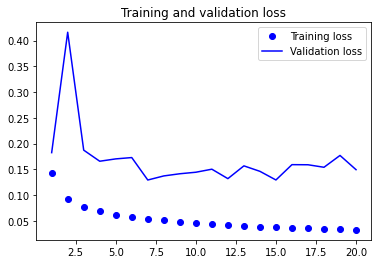

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
std[6] * 0.15

0.056001189351081844

In [ ]:
len(std)

11

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(layers.GRU(32,
  dropout=0.2,
  recurrent_dropout=0.2,
  input_shape=(None, float_data.shape[-1])))
model2.add(layers.Dense(1))
model2.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history2 = model2.fit(train_gen,
  steps_per_epoch=200,
  epochs=20,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/20
200/200 [==============================] - 12s 48ms/step - loss: 0.1624 - val_loss: 0.1813
Epoch 2/20
200/200 [==============================] - 9s 45ms/step - loss: 0.1034 - val_loss: 0.1568
Epoch 3/20
200/200 [==============================] - 9s 47ms/step - loss: 0.0957 - val_loss: 0.1529
Epoch 4/20
200/200 [==============================] - 9s 46ms/step - loss: 0.0921 - val_loss: 0.1401
Epoch 5/20
200/200 [==============================] - 9s 47ms/step - loss: 0.0886 - val_loss: 0.1605
Epoch 6/20
200/200 [==============================] - 9s 45ms/step - loss: 0.0862 - val_loss: 0.1781
Epoch 7/20
200/200 [==============================] - 9s 46ms/step - loss: 0.0839 - val_loss: 0.1360
Epoch 8/20
200/200 [==============================] - 9s 45ms/step - loss: 0.0818 - val_loss: 0.1242
Epoch 9/20
200/200 [==============================] - 9s 44ms/step - loss: 0.0807 - val_loss: 0.1276
Epoch 10/20
200/200 [==============================] - 9s 46ms/step - loss: 0.0787 - val_l

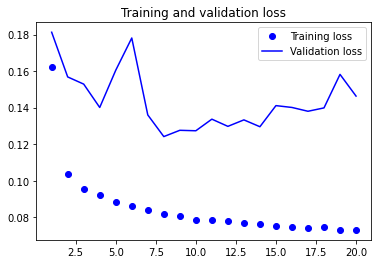

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.figure()
plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
eval = model.evaluate(test_gen, steps = test_steps)

311/311 [==============================] - 2s 8ms/step - loss: 0.2357


In [ ]:
eval *std[6]

0.08795227997066002

In [ ]:
eval2 = model2.evaluate(test_gen, steps = test_steps)
eval2 *std[6]

311/311 [==============================] - 3s 8ms/step - loss: 0.2062


0.07695414012214075

Pierwszy model - tylko warstwy Dense
Drugi model - tylko warstwa GRU

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(layers.GRU(32,
  dropout=0.2,
  recurrent_dropout=0.2,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model3.add(layers.GRU(64,
  dropout=0.2,
  recurrent_dropout=0.2,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model3.add(layers.GRU(64,
  dropout=0.2,
  recurrent_dropout=0.2,
  input_shape=(None, float_data.shape[-1])))
model3.add(layers.Dense(1))
model3.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history3 = model3.fit(train_gen,
  steps_per_epoch=200,
  epochs=20,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/20
200/200 [==============================] - 46s 192ms/step - loss: 0.1557 - val_loss: 0.1350
Epoch 2/20
200/200 [==============================] - 38s 191ms/step - loss: 0.1250 - val_loss: 0.1944
Epoch 3/20
200/200 [==============================] - 38s 192ms/step - loss: 0.1165 - val_loss: 0.1930
Epoch 4/20
200/200 [==============================] - 39s 193ms/step - loss: 0.1086 - val_loss: 0.1390
Epoch 5/20
200/200 [==============================] - 37s 185ms/step - loss: 0.1047 - val_loss: 0.1428
Epoch 6/20
200/200 [==============================] - 37s 186ms/step - loss: 0.1006 - val_loss: 0.1589
Epoch 7/20
200/200 [==============================] - 38s 189ms/step - loss: 0.0979 - val_loss: 0.1965
Epoch 8/20
200/200 [==============================] - 38s 188ms/step - loss: 0.0948 - val_loss: 0.1849
Epoch 9/20
200/200 [==============================] - 38s 191ms/step - loss: 0.0919 - val_loss: 0.1751
Epoch 10/20
200/200 [==============================] - 38s 191ms/step - l

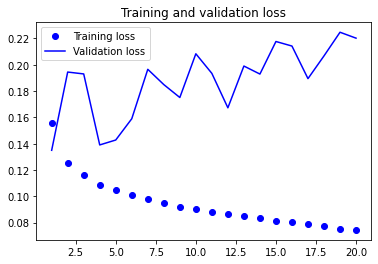

In [ ]:
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs3 = range(1, len(loss2) + 1)
plt.figure()
plt.plot(epochs3, loss3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
eval3 = model3.evaluate(test_gen, steps = test_steps)
eval3 *std[6]

311/311 [==============================] - 8s 25ms/step - loss: 0.2494


0.0930669105021078

MODEL 4 - Tylko LSTM

In [ ]:
model4 = tf.keras.models.Sequential()
model4.add(layers.LSTM(32,
  dropout=0.2,
  recurrent_dropout=0.2,
  input_shape=(None, float_data.shape[-1])))
model4.add(layers.Dense(1))
model4.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history4 = model4.fit(train_gen,
  steps_per_epoch=200,
  epochs=20,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/20
200/200 [==============================] - 17s 64ms/step - loss: 0.1162 - val_loss: 0.1904
Epoch 2/20
200/200 [==============================] - 10s 48ms/step - loss: 0.0873 - val_loss: 0.1803
Epoch 3/20
200/200 [==============================] - 10s 50ms/step - loss: 0.0819 - val_loss: 0.1869
Epoch 4/20
200/200 [==============================] - 10s 51ms/step - loss: 0.0789 - val_loss: 0.1753
Epoch 5/20
200/200 [==============================] - 10s 49ms/step - loss: 0.0763 - val_loss: 0.1669
Epoch 6/20
200/200 [==============================] - 11s 53ms/step - loss: 0.0752 - val_loss: 0.1735
Epoch 7/20
200/200 [==============================] - 10s 49ms/step - loss: 0.0736 - val_loss: 0.1720
Epoch 8/20
200/200 [==============================] - 10s 51ms/step - loss: 0.0724 - val_loss: 0.1804
Epoch 9/20
200/200 [==============================] - 11s 55ms/step - loss: 0.0713 - val_loss: 0.1827
Epoch 10/20
200/200 [==============================] - 11s 55ms/step - loss: 0.070

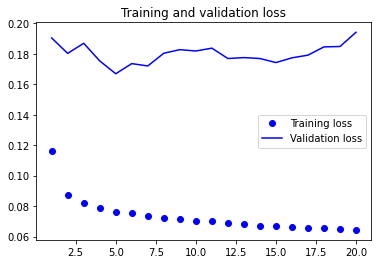

In [ ]:
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
epochs4 = range(1, len(loss4) + 1)
plt.figure()
plt.plot(epochs4, loss4, 'bo', label='Training loss')
plt.plot(epochs4, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
eval4 = model4.evaluate(test_gen, steps = test_steps)
eval4 *std[6]

311/311 [==============================] - 3s 10ms/step - loss: 0.3139


0.1171505600198346

TERAZ LSTM z 2 warstwami

In [ ]:
model5 = tf.keras.models.Sequential()
model5.add(layers.LSTM(64,
  dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model5.add(layers.LSTM(64,
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model5.add(layers.Dense(1))
model5.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history5 = model5.fit(train_gen,
  steps_per_epoch=200,
  epochs=8,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/8
200/200 [==============================] - 42s 171ms/step - loss: 0.1174 - val_loss: 0.2654
Epoch 2/8
200/200 [==============================] - 33s 167ms/step - loss: 0.0893 - val_loss: 0.1948
Epoch 3/8
200/200 [==============================] - 34s 170ms/step - loss: 0.0831 - val_loss: 0.2234
Epoch 4/8
200/200 [==============================] - 34s 170ms/step - loss: 0.0780 - val_loss: 0.2127
Epoch 5/8
200/200 [==============================] - 33s 164ms/step - loss: 0.0747 - val_loss: 0.2153
Epoch 6/8
200/200 [==============================] - 33s 166ms/step - loss: 0.0703 - val_loss: 0.1840
Epoch 7/8
200/200 [==============================] - 33s 164ms/step - loss: 0.0683 - val_loss: 0.2050
Epoch 8/8
200/200 [==============================] - 34s 168ms/step - loss: 0.0656 - val_loss: 0.1834


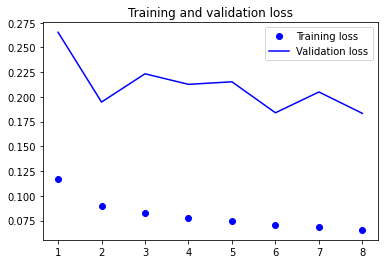

In [ ]:
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']
epochs5 = range(1, len(loss5) + 1)
plt.figure()
plt.plot(epochs5, loss5, 'bo', label='Training loss')
plt.plot(epochs5, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
eval5 = model5.evaluate(test_gen, steps = test_steps)
eval5 *std[6]

311/311 [==============================] - 7s 24ms/step - loss: 0.2082


0.0776964141824652

MODEL  BEZ RECUREN DROPOUT

In [ ]:
model6 = tf.keras.models.Sequential()
model6.add(layers.LSTM(64,
  dropout=0.1,
  #recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model6.add(layers.LSTM(64,
  dropout=0.1,
  #recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model6.add(layers.Dense(1))
model6.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history6 = model6.fit(train_gen,
  steps_per_epoch=200,
  epochs=8,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/8
200/200 [==============================] - 32s 140ms/step - loss: 0.1202 - val_loss: 0.1810
Epoch 2/8
200/200 [==============================] - 24s 121ms/step - loss: 0.0888 - val_loss: 0.1743
Epoch 3/8
200/200 [==============================] - 25s 125ms/step - loss: 0.0826 - val_loss: 0.1648
Epoch 4/8
200/200 [==============================] - 25s 124ms/step - loss: 0.0780 - val_loss: 0.1848
Epoch 5/8
200/200 [==============================] - 25s 123ms/step - loss: 0.0748 - val_loss: 0.1971
Epoch 6/8
200/200 [==============================] - 23s 118ms/step - loss: 0.0712 - val_loss: 0.2209
Epoch 7/8
200/200 [==============================] - 25s 124ms/step - loss: 0.0684 - val_loss: 0.2126
Epoch 8/8
200/200 [==============================] - 25s 126ms/step - loss: 0.0647 - val_loss: 0.2470


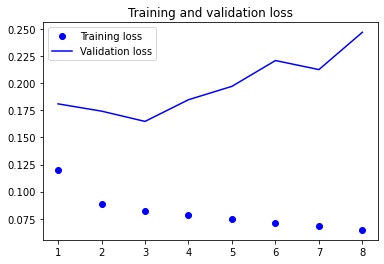

In [ ]:
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']
epochs6 = range(1, len(loss6) + 1)
plt.figure()
plt.plot(epochs6, loss6, 'bo', label='Training loss')
plt.plot(epochs6, val_loss6, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
eval6 = model6.evaluate(test_gen, steps = test_steps)
eval6 *std[6]

311/311 [==============================] - 12s 37ms/step - loss: 0.2848


0.10628395339932073

BEZ DROPOUT

In [ ]:
model7 = tf.keras.models.Sequential()
model7.add(layers.LSTM(64,
  #dropout=0.1,
  recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model7.add(layers.LSTM(64,
  #dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model7.add(layers.Dense(1))
model7.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history7 = model7.fit(train_gen,
  steps_per_epoch=200,
  epochs=8,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/8
200/200 [==============================] - 42s 181ms/step - loss: 0.1125 - val_loss: 0.2186
Epoch 2/8
200/200 [==============================] - 30s 149ms/step - loss: 0.0782 - val_loss: 0.1709
Epoch 3/8
200/200 [==============================] - 31s 153ms/step - loss: 0.0707 - val_loss: 0.2009
Epoch 4/8
200/200 [==============================] - 31s 156ms/step - loss: 0.0660 - val_loss: 0.1985
Epoch 5/8
200/200 [==============================] - 31s 153ms/step - loss: 0.0629 - val_loss: 0.1745
Epoch 6/8
200/200 [==============================] - 31s 154ms/step - loss: 0.0596 - val_loss: 0.2038
Epoch 7/8
200/200 [==============================] - 31s 153ms/step - loss: 0.0571 - val_loss: 0.1761
Epoch 8/8
200/200 [==============================] - 30s 148ms/step - loss: 0.0558 - val_loss: 0.1959


In [ ]:
eval7 = model7.evaluate(test_gen, steps = test_steps)
eval7 *std[6]

311/311 [==============================] - 7s 23ms/step - loss: 0.2263


0.08447412922691289

WITHOUT DROPOUTS

In [ ]:
model8 = tf.keras.models.Sequential()
model8.add(layers.LSTM(64,
  #dropout=0.1,
  #recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model8.add(layers.LSTM(64,
  #dropout=0.1,
  #recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model8.add(layers.Dense(1))
model8.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history8 = model8.fit(train_gen,
  steps_per_epoch=200,
  epochs=8,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/8
200/200 [==============================] - 34s 147ms/step - loss: 0.1078 - val_loss: 0.1927
Epoch 2/8
200/200 [==============================] - 24s 118ms/step - loss: 0.0776 - val_loss: 0.1455
Epoch 3/8
200/200 [==============================] - 23s 116ms/step - loss: 0.0706 - val_loss: 0.1727
Epoch 4/8
200/200 [==============================] - 24s 119ms/step - loss: 0.0664 - val_loss: 0.1385
Epoch 5/8
200/200 [==============================] - 24s 121ms/step - loss: 0.0628 - val_loss: 0.1834
Epoch 6/8
200/200 [==============================] - 24s 120ms/step - loss: 0.0592 - val_loss: 0.1574
Epoch 7/8
200/200 [==============================] - 23s 117ms/step - loss: 0.0567 - val_loss: 0.1686
Epoch 8/8
200/200 [==============================] - 24s 119ms/step - loss: 0.0542 - val_loss: 0.1708


In [ ]:
eval8 = model8.evaluate(test_gen, steps = test_steps)
eval8 *std[6]

311/311 [==============================] - 9s 28ms/step - loss: 0.2045


0.07630462112311776

In [ ]:
#WITHOUT DROPOUTS OPTIMIZED

In [ ]:
model9 = tf.keras.models.Sequential()
model9.add(layers.LSTM(64,
  #dropout=0.1,
  #recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model9.add(layers.LSTM(64,
  #dropout=0.1,
  #recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model9.add(layers.Dense(32))
model9.add(layers.Dense(1))
model9.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history9 = model9.fit(train_gen,
  steps_per_epoch=200,
  epochs=10,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/10
200/200 [==============================] - 36s 153ms/step - loss: 0.1148 - val_loss: 0.1890
Epoch 2/10
200/200 [==============================] - 24s 118ms/step - loss: 0.0831 - val_loss: 0.1849
Epoch 3/10
200/200 [==============================] - 24s 118ms/step - loss: 0.0751 - val_loss: 0.1492
Epoch 4/10
200/200 [==============================] - 24s 122ms/step - loss: 0.0705 - val_loss: 0.1825
Epoch 5/10
200/200 [==============================] - 24s 122ms/step - loss: 0.0665 - val_loss: 0.1373
Epoch 6/10
200/200 [==============================] - 24s 120ms/step - loss: 0.0637 - val_loss: 0.1529
Epoch 7/10
200/200 [==============================] - 25s 123ms/step - loss: 0.0614 - val_loss: 0.1487
Epoch 8/10
200/200 [==============================] - 24s 118ms/step - loss: 0.0590 - val_loss: 0.1668
Epoch 9/10
200/200 [==============================] - 24s 122ms/step - loss: 0.0568 - val_loss: 0.1785
Epoch 10/10
200/200 [==============================] - 24s 119ms/step - l

In [ ]:
eval9 = model9.evaluate(test_gen, steps = test_steps)
eval9 *std[6]

311/311 [==============================] - 9s 28ms/step - loss: 0.1926


0.07189578325609913

In [ ]:
model10 = tf.keras.models.Sequential()
model10.add(layers.Dense(32))
model10.add(layers.LSTM(8,
  #dropout=0.1,
  #recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model10.add(layers.LSTM(16,
  #dropout=0.1,
  #recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model10.add(layers.Dense(32))
model10.add(layers.Dense(64))
model10.add(layers.Dense(1))
model10.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history10 = model10.fit(train_gen,
  steps_per_epoch=200,
  epochs=20,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/20
200/200 [==============================] - 14s 50ms/step - loss: 0.1295 - val_loss: 0.2358
Epoch 2/20
200/200 [==============================] - 9s 46ms/step - loss: 0.0920 - val_loss: 0.2776
Epoch 3/20
200/200 [==============================] - 9s 47ms/step - loss: 0.0846 - val_loss: 0.1480
Epoch 4/20
200/200 [==============================] - 9s 46ms/step - loss: 0.0808 - val_loss: 0.2083
Epoch 5/20
200/200 [==============================] - 9s 46ms/step - loss: 0.0770 - val_loss: 0.1414
Epoch 6/20
200/200 [==============================] - 9s 46ms/step - loss: 0.0753 - val_loss: 0.1530
Epoch 7/20
200/200 [==============================] - 9s 47ms/step - loss: 0.0734 - val_loss: 0.1180
Epoch 8/20
200/200 [==============================] - 10s 48ms/step - loss: 0.0722 - val_loss: 0.1303
Epoch 9/20
200/200 [==============================] - 10s 48ms/step - loss: 0.0705 - val_loss: 0.1250
Epoch 10/20
200/200 [==============================] - 9s 45ms/step - loss: 0.0693 - val

In [ ]:
eval10 = model10.evaluate(test_gen, steps = test_steps)
eval10 *std[6]

311/311 [==============================] - 3s 10ms/step - loss: 0.1127


0.04206762076413728

In [ ]:
model11 = tf.keras.models.Sequential()
model11.add(layers.Dense(32))
model11.add(layers.Dense(64))
model11.add(layers.GRU(128,
  #dropout=0.1,
  #recurrent_dropout=0.1,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model11.add(layers.LSTM(128,
  #dropout=0.1,
  #recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model11.add(layers.Dense(64))
model11.add(layers.Dense(32))
model11.add(layers.Dense(1))
model11.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history11 = model11.fit(train_gen,
  steps_per_epoch=200,
  epochs=20,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/20
200/200 [==============================] - 68s 314ms/step - loss: 0.1577 - val_loss: 0.2380
Epoch 2/20
200/200 [==============================] - 63s 315ms/step - loss: 0.1029 - val_loss: 0.2141
Epoch 3/20
200/200 [==============================] - 63s 313ms/step - loss: 0.0927 - val_loss: 0.2081
Epoch 4/20
200/200 [==============================] - 63s 315ms/step - loss: 0.0859 - val_loss: 0.1882
Epoch 5/20
200/200 [==============================] - 63s 316ms/step - loss: 0.0801 - val_loss: 0.2287
Epoch 6/20
200/200 [==============================] - 62s 311ms/step - loss: 0.0732 - val_loss: 0.2124
Epoch 7/20
200/200 [==============================] - 62s 310ms/step - loss: 0.0676 - val_loss: 0.2321
Epoch 8/20
200/200 [==============================] - 62s 310ms/step - loss: 0.0619 - val_loss: 0.2276
Epoch 9/20
200/200 [==============================] - 62s 312ms/step - loss: 0.0574 - val_loss: 0.2650
Epoch 10/20
200/200 [==============================] - 62s 312ms/step - l

In [ ]:
eval11 = model11.evaluate(test_gen, steps = test_steps)
eval11 *std[6]

311/311 [==============================] - 21s 68ms/step - loss: 0.4539


0.16939473290322482